2020-02-20
2020-02-21    17
2020-02-22    59
2020-02-23    73
2020-02-24    76
2020-02-25    95
Name: 1, dtype: int64


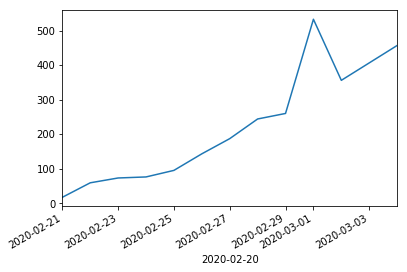

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                   D2.1   No. Observations:                   10
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -66.496
Method:                           css   S.D. of innovations            186.910
Date:                Tue, 03 Mar 2020   AIC                            136.991
Time:                        23:39:49   BIC                            137.596
Sample:                             2   HQIC                           136.327
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9000     59.106      0.100      0.920    -109.946     121.746


TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [12]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

#https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('corona-virus.csv', header=0, delimiter=",",parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

model = ARIMA(series, order=(0,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())